# Feature engineering demonstration

---
## Load data from CSV

In [34]:
!ls

 db_data.csv				    Untitled.ipynb
 deutsche-boerse-xetra-pds_2017-10-16.csv   work
'Feature Engineering Demonstration.ipynb'


In [3]:
# Introduce imports which we will use next
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [102]:
df = pd.read_csv ('deutsche-boerse-xetra-pds_week39.csv')

---
## Explore the data

In [37]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63673 entries, 0 to 63672
Data columns (total 14 columns):
ISIN              63673 non-null object
Mnemonic          63673 non-null object
SecurityDesc      63673 non-null object
SecurityType      63673 non-null object
Currency          63673 non-null object
SecurityID        63673 non-null int64
Date              63673 non-null object
Time              63673 non-null object
StartPrice        63673 non-null float64
MaxPrice          63673 non-null float64
MinPrice          63673 non-null float64
EndPrice          63673 non-null float64
TradedVolume      63673 non-null int64
NumberOfTrades    63673 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 6.8+ MB


In [38]:
df.sample (5)

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
49995,DE000A0STST2,TTI,TOM TAILOR HLDG NA O.N.,Common stock,EUR,2504401,2017-10-16,09:10,9.239,9.239,9.231,9.231,685,4
44987,DE0006602006,G1A,GEA GROUP AG,Common stock,EUR,2505051,2017-10-16,15:12,40.610,40.610,40.610,40.610,84,1
18629,DE0005470306,EVD,CTS EVENTIM KGAA,Common stock,EUR,2504934,2017-10-16,07:32,36.145,36.145,36.145,36.145,22,2
17486,GB0000566504,BIL,"BHP BILLITON DL-,50",Common stock,EUR,2505369,2017-10-16,07:23,16.140,16.140,16.140,16.140,2100,2
1960,IE00B1W57M07,IQQ9,ISHSII-BRIC 50 DL DIS,ETF,EUR,2505596,2017-10-16,12:19,26.190,26.190,26.190,26.190,200,1


In [39]:
len(df.ISIN.unique())

1492

In [40]:
len(df.Mnemonic.unique())

1492

In [41]:
len(df.SecurityDesc.unique())

1462

In [42]:
df.SecurityType.unique()

array(['ETF', 'Common stock', 'ETC', 'Other', 'ETN'], dtype=object)

In [43]:
df.Currency.unique()

array(['EUR', 'USD'], dtype=object)

In [48]:
len(df.SecurityID.unique())

1492

---
## Clean the data 

In [103]:
df['dt_date'] = df.Date.astype(np.datetime64)

In [104]:
df['dt_time'] = (df.Date +' '+ df.Time).astype(np.datetime64)

In [105]:
df.SecurityType = df.SecurityType.astype('category')

In [106]:
df.Currency = df.Currency.astype('category')

In [107]:
df.drop(labels=['SecurityID','ISIN','SecurityDesc'], axis=1, inplace=True)

In [108]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63673 entries, 0 to 63672
Data columns (total 13 columns):
Mnemonic          63673 non-null object
SecurityType      63673 non-null category
Currency          63673 non-null category
Date              63673 non-null object
Time              63673 non-null object
StartPrice        63673 non-null float64
MaxPrice          63673 non-null float64
MinPrice          63673 non-null float64
EndPrice          63673 non-null float64
TradedVolume      63673 non-null int64
NumberOfTrades    63673 non-null int64
dt_date           63673 non-null datetime64[ns]
dt_time           63673 non-null datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 5.5+ MB


In [109]:
df.sample(5)

,Mnemonic,SecurityType,Currency,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,dt_date,dt_time
30268,HAB,Common stock,EUR,2017-10-16,10:18,9.215,9.215,9.215,9.215,80,1,2017-10-16,2017-10-16 10:18:00
6834,ADS,Common stock,EUR,2017-10-16,13:05,192.550,192.550,192.550,192.550,434,1,2017-10-16,2017-10-16 13:05:00
35660,SNH,Common stock,EUR,2017-10-16,14:06,3.857,3.857,3.857,3.857,50,1,2017-10-16,2017-10-16 14:06:00
62441,DWNI,Common stock,EUR,2017-10-16,08:50,36.260,36.260,36.255,36.255,197,2,2017-10-16,2017-10-16 08:50:00
15081,SAP,Common stock,EUR,2017-10-16,07:07,95.040,95.060,94.970,94.990,6057,32,2017-10-16,2017-10-16 07:07:00


---
## Engineer a feature set

In [110]:
# Mark data points with trades outside of opening and closing hours
date = '2017-10-16'
time_fmt = "%Y-%m-%d%H:%M"
opening_hours = datetime.strptime(date +"08:00", time_fmt)
closing_hours = datetime.strptime(date +"20:00", time_fmt)

df['in_trading_hours'] = 0
df.loc[(df.dt_time > opening_hours) & (df.dt_time <= closing_hours), 'in_trading_hours'] = 1

In [111]:
df['pct_change'] = (df.EndPrice - df.StartPrice)/df.StartPrice

In [112]:
df['day_of_week'] = df.dt_date.dt.weekday

In [113]:
df['min_of_day'] = df.dt_time.dt.hour*60 + df.dt_time.dt.minute

In [114]:
minutes_in_day = 24*60

df['sin_time'] = np.sin(2*np.pi*df.min_of_day/minutes_in_day)
df['cos_time'] = np.cos(2*np.pi*df.min_of_day/minutes_in_day)

In [115]:
df.sample (5)

,Mnemonic,SecurityType,Currency,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,dt_date,dt_time,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time
14446,VT9,Common stock,EUR,2017-10-16,07:03,48.690,48.690,48.690,48.690,125,2,2017-10-16,2017-10-16 07:03:00,0,0.000000,0,423,0.962455,-0.271440
13761,IQQP,ETF,EUR,2017-10-16,13:56,39.870,39.870,39.870,39.870,75,1,2017-10-16,2017-10-16 13:56:00,1,0.000000,0,836,-0.484810,-0.874620
50653,HLAG,Common stock,EUR,2017-10-16,09:15,36.510,36.510,36.495,36.495,220,3,2017-10-16,2017-10-16 09:15:00,1,-0.000411,0,555,0.659346,-0.751840
8292,TUI1,Common stock,EUR,2017-10-16,13:18,14.860,14.860,14.860,14.860,704,2,2017-10-16,2017-10-16 13:18:00,1,0.000000,0,798,-0.333807,-0.942641
10634,PSM,Common stock,EUR,2017-10-16,13:36,29.985,29.995,29.985,29.995,1657,4,2017-10-16,2017-10-16 13:36:00,1,0.000334,0,816,-0.406737,-0.913545


In [116]:
df.corr()

,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time
StartPrice,1.000000,1.000000,1.000000,1.000000,-0.088671,-0.008915,0.001830,-0.000899,NaN,-0.002150,0.002042,-0.005392
MaxPrice,1.000000,1.000000,0.999999,1.000000,-0.088659,-0.008792,0.001784,-0.000714,NaN,-0.002177,0.002067,-0.005349
MinPrice,1.000000,0.999999,1.000000,1.000000,-0.088685,-0.009065,0.001868,-0.000605,NaN,-0.002132,0.002028,-0.005428
EndPrice,1.000000,1.000000,1.000000,1.000000,-0.088673,-0.008947,0.001828,-0.000438,NaN,-0.002153,0.002045,-0.005390
TradedVolume,-0.088671,-0.088659,-0.088685,-0.088673,1.000000,0.312102,-0.032168,0.016731,NaN,-0.013395,0.010878,0.034987
NumberOfTrades,-0.008915,-0.008792,-0.009065,-0.008947,0.312102,1.000000,-0.055584,-0.017132,NaN,-0.001005,-0.004368,0.080519
in_trading_hours,0.001830,0.001784,0.001868,0.001828,-0.032168,-0.055584,1.000000,0.006320,NaN,0.569789,-0.515634,-0.750213
pct_change,-0.000899,-0.000714,-0.000605,-0.000438,0.016731,-0.017132,0.006320,1.000000,NaN,0.000084,0.000699,-0.005369
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_of_day,-0.002150,-0.002177,-0.002132,-0.002153,-0.013395,-0.001005,0.569789,0.000084,NaN,1.000000,-0.996903,-0.519815


---
## Create a target variable

In [117]:
df['movement'] = 0
df.loc[(df['pct_change'] > 0), 'movement'] = 1
df.loc[(df['pct_change'] < 0), 'movement'] = -1
df['next_movement'] = 0
df['next_movement'] = df.movement.shift (-1)

In [118]:
df.head(10)

,Mnemonic,SecurityType,Currency,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,...,dt_date,dt_time,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time,movement,next_movement
0,DBXD,ETF,EUR,2017-10-16,12:00,126.720,126.720,126.720,126.720,58,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
1,WIN,Common stock,EUR,2017-10-16,12:00,71.100,71.100,71.100,71.100,6,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
2,MTX,Common stock,EUR,2017-10-16,12:00,135.500,135.500,135.500,135.500,36,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,1.0
3,DWNI,Common stock,EUR,2017-10-16,12:00,36.365,36.375,36.365,36.370,1635,...,2017-10-16,2017-10-16 12:00:00,1,0.000137,0,720,1.224647e-16,-1.0,1,0.0
4,D6H,Common stock,EUR,2017-10-16,12:00,42.750,42.750,42.750,42.750,21,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
5,M5Z,Common stock,EUR,2017-10-16,12:00,37.850,37.850,37.845,37.850,767,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
6,M3B,Common stock,EUR,2017-10-16,12:00,0.698,0.698,0.698,0.698,10000,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
7,OD7U,ETC,EUR,2017-10-16,12:00,4.039,4.039,4.039,4.039,1000,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
8,AOX,Common stock,EUR,2017-10-16,12:00,12.455,12.455,12.455,12.455,47,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,0.0
9,GXI,Common stock,EUR,2017-10-16,12:00,66.700,66.700,66.700,66.700,118,...,2017-10-16,2017-10-16 12:00:00,1,0.000000,0,720,1.224647e-16,-1.0,0,1.0


In [120]:
pd.options.display.max_columns = 35
df.corr ()

,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time,movement,next_movement
StartPrice,1.000000,1.000000,1.000000,1.000000,-0.088671,-0.008915,0.001830,-0.000899,NaN,-0.002150,0.002042,-0.005392,-0.008832,-0.006268
MaxPrice,1.000000,1.000000,0.999999,1.000000,-0.088659,-0.008792,0.001784,-0.000714,NaN,-0.002177,0.002067,-0.005349,-0.008673,-0.006266
MinPrice,1.000000,0.999999,1.000000,1.000000,-0.088685,-0.009065,0.001868,-0.000605,NaN,-0.002132,0.002028,-0.005428,-0.008654,-0.006267
EndPrice,1.000000,1.000000,1.000000,1.000000,-0.088673,-0.008947,0.001828,-0.000438,NaN,-0.002153,0.002045,-0.005390,-0.008507,-0.006266
TradedVolume,-0.088671,-0.088659,-0.088685,-0.088673,1.000000,0.312102,-0.032168,0.016731,NaN,-0.013395,0.010878,0.034987,0.007119,0.003772
NumberOfTrades,-0.008915,-0.008792,-0.009065,-0.008947,0.312102,1.000000,-0.055584,-0.017132,NaN,-0.001005,-0.004368,0.080519,0.001462,0.001534
in_trading_hours,0.001830,0.001784,0.001868,0.001828,-0.032168,-0.055584,1.000000,0.006320,NaN,0.569789,-0.515634,-0.750213,0.003239,0.003314
pct_change,-0.000899,-0.000714,-0.000605,-0.000438,0.016731,-0.017132,0.006320,1.000000,NaN,0.000084,0.000699,-0.005369,0.395174,0.005842
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_of_day,-0.002150,-0.002177,-0.002132,-0.002153,-0.013395,-0.001005,0.569789,0.000084,NaN,1.000000,-0.996903,-0.519815,0.001022,0.001082


In [123]:
df.corr()[['next_movement']]

,next_movement
StartPrice,-0.006268
MaxPrice,-0.006266
MinPrice,-0.006267
EndPrice,-0.006266
TradedVolume,0.003772
NumberOfTrades,0.001534
in_trading_hours,0.003314
pct_change,0.005842
day_of_week,NaN
min_of_day,0.001082


---
## Quick test using sklearn

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.3, max_depth=12)

In [192]:
from sklearn.model_selection import train_test_split

data_X = pd.get_dummies(df.drop(columns=['Mnemonic', 'Date', 'Time', 'dt_date', 'dt_time', 'next_movement'], axis = 1)) 
data_Y = df.next_movement
data_Y.fillna(0, inplace=True)
train_X, test_X, train_Y, test_Y = train_test_split (data_X, data_Y, test_size=0.2)

sample_weights = np.ones(train_X.shape[0])

def report (i, estimator, local_vals):
    print ("iteration {}: complete".format (i))

In [193]:
gbc.fit(train_X.values, train_Y.values, sample_weight=sample_weights, monitor=report)

iteration 0: complete
iteration 1: complete
iteration 2: complete
iteration 3: complete
iteration 4: complete
iteration 5: complete
iteration 6: complete
iteration 7: complete
iteration 8: complete
iteration 9: complete
iteration 10: complete
iteration 11: complete
iteration 12: complete
iteration 13: complete
iteration 14: complete
iteration 15: complete
iteration 16: complete
iteration 17: complete
iteration 18: complete
iteration 19: complete
iteration 20: complete
iteration 21: complete
iteration 22: complete
iteration 23: complete
iteration 24: complete
iteration 25: complete
iteration 26: complete
iteration 27: complete
iteration 28: complete
iteration 29: complete
iteration 30: complete
iteration 31: complete
iteration 32: complete
iteration 33: complete
iteration 34: complete
iteration 35: complete
iteration 36: complete
iteration 37: complete
iteration 38: complete
iteration 39: complete
iteration 40: complete
iteration 41: complete
iteration 42: complete
iteration 43: complet

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False)

In [197]:
pred = gbc.predict(test_X)

In [198]:
pred[:5]

array([ 0.,  0.,  0.,  0.,  0.])

In [201]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [203]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(test_Y, pred)
cfm

array([[ 215, 1998,  198],
       [ 437, 7020,  375],
       [ 194, 2095,  203]])

Normalized confusion matrix
[[ 0.08917462  0.82870178  0.0821236 ]
 [ 0.05579673  0.89632278  0.04788049]
 [ 0.07784912  0.84069021  0.08146067]]


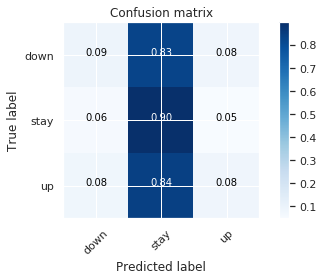

In [205]:
plot_confusion_matrix (cfm, classes=['down', 'stay', 'up'], normalize=True)

In [195]:
!ls -lh work/ddata.csv

-rw-r--r-- 1 jovyan users 35M Oct 30 06:17 work/ddata.csv


In [196]:
!cp work/ddata.csv deutsche-boerse-xetra-pds_week39.csv